### Student Name: Anthony Viscovich

In [63]:
#TODO: import the modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectKBest
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

### Step 1 - Load the data

<AxesSubplot:>

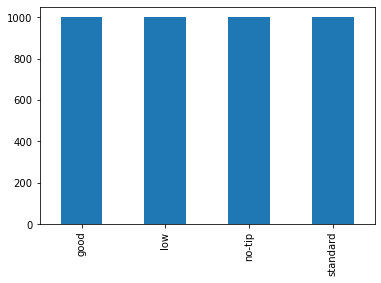

In [64]:
sample_size = 1000
file_path   = 'trip_data.csv' #TODO: provide the file path or URL to the dataset `trip_data.csv`

df = pd.read_csv(file_path)
df = df.groupby('tip').apply(lambda x: x.sample(sample_size))
df = df.sample(frac=1) #shuffle the dataframe rows

#visualize the sample data, which contain 1000 observations from each class
df.tip.value_counts().sort_index().plot.bar()

In [65]:
df['lpep_dropoff_datetime'] = pd.to_timedelta(df['lpep_dropoff_datetime'].str.split().str[1]).dt.total_seconds()
df['lpep_pickup_datetime'] = pd.to_timedelta(df['lpep_pickup_datetime'].str.split().str[1]).dt.total_seconds()


### Step 2: Create a new feature called `trip_duration`

In [66]:
#Create a new feature called trip_duration and add it to the dataframe

t_d= df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime'] #TODO: Calculate the difference between `lpep_pickup_datetime` and `lpep_dropoff_datetime` in seconds (this should be a positive number).

df['trip_duration'] = t_d#TODO: store the elapsed time (from above) into the dataframe.

del df['lpep_dropoff_datetime']
del df['lpep_pickup_datetime'] #Remove the `lpep_pickup_datetime` and `lpep_dropoff_datetime` from the dataframe.

### Step 3: Encode the labels in the `tip` field.
Use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) in scikit learn.

In [68]:
#Encode the class labels

le = preprocessing.LabelEncoder() #TODO: Initialize the `LabelEncoder`

le.fit(df['tip'])#TODO: Fit the `LabelEncoder` to the class labels in the 'tip' field

le.classes_#TODO: Use the `LabelEncoder` to encode class labels in the 'tip' field.

print(le.classes_)#TODO: Display the encoded labels


['good' 'low' 'no-tip' 'standard']


In [73]:
#assign the input features and the class labels to variables 'X' and 'y' respectively.

X = df.iloc[:,0:14].to_numpy() #TODO: assign the input features (in the dataframe) to a variable 'X'.
y = df.iloc[:,14].tolist() #TODO: assign the encoded labels to a variale 'y'.

### Step 4: Feature selection

#### Filter Methods

[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection): use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) to select the seven highest scoring features (i.e. k=7).

In [74]:
#Univariate feature selection using SelectKBest.

k_best   = SelectKBest( #TODO choose either chi2 or f_classif
                     k= 7 #TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)

cols = k_best.get_support(indices=True)
features_df_new = df.iloc[:,cols]
features_df_new.head()#TODO: display the names of the selected features below


,,VendorID,DOLocationID,trip_distance,fare_amount,extra,total_amount,congestion_surcharge
tip,,,,,,,,
low,63810,2,141,3.00,14.0,1.0,20.55,2.75
good,85051,2,61,2.79,12.5,0.0,16.62,0.00
standard,101774,2,28,1.60,9.0,1.0,12.96,0.00
no-tip,129046,2,42,1.70,11.0,0.0,11.80,0.00
good,14952,2,166,3.11,12.0,1.0,17.25,0.00


#### Wrapper methods

Identify the top seven features using [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html) and [Recursive feature elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE).

Here is an example on using [SVMs for classification](https://scikit-learn.org/stable/modules/svm.html#classification) and [RFE](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py) in scikit-learn.

In [75]:

svm_estimator = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe = RFE(estimator= svm_estimator, #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select= 7 #TODO: enter the number of required features
         )

rfe.fit(X, y) #Note: this may take a few minutes to complete

cols = rfe.get_support(indices=True)
features_df_new_2 = df.iloc[:,cols]
features_df_new_2.head()#TODO: display the names of the selected features below


Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


,,RatecodeID,fare_amount,extra,tolls_amount,total_amount,trip_type,congestion_surcharge
tip,,,,,,,,
low,63810,1,14.0,1.0,0.0,20.55,1,2.75
good,85051,1,12.5,0.0,0.0,16.62,1,0.00
standard,101774,1,9.0,1.0,0.0,12.96,1,0.00
no-tip,129046,1,11.0,0.0,0.0,11.80,1,0.00
good,14952,1,12.0,1.0,0.0,17.25,1,0.00


#### The results
Compare and contrast the selected features from the filter and wrapper methods. 

#TODO: Compare and contrast the results
filter: VendorID, DOLocation, Trip distance, Fare amount, Extra, Total amount, congestion surcharge
wrapper: RatecodeID, Tolls amount, Trip type, Fare amount, extra, total amount, congestion surcharge

### Step 5: Standardize the input features
Use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) in [scikit-learn's preprocessing module](https://scikit-learn.org/stable/modules/preprocessing.html) to scale the input features between 0.1 and 0.9 (i.e. the min and max respectively). 

In [76]:
#Standardize the input features
scaler = MinMaxScaler(feature_range= (0.1, 0.9)#TODO: provide the min and max values for the features
                     )

X_s = scaler.fit_transform(X)

In [77]:
k_best   = k_best.fit(X_s, y)

rfe.fit(X_s, y)#TODO: Perform the SelectKBest and Recursive Feature Elimination steps using the standardized data

cols = k_best.get_support(indices=True)
features_df_new_3 = df.iloc[:,cols]
features_df_new_3.head()

cols = rfe.get_support(indices=True)
features_df_new_4 = df.iloc[:,cols]
features_df_new_4.head()

#TODO: display the names of the selected features for each method

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


,,trip_distance,fare_amount,mta_tax,tolls_amount,total_amount,trip_type,congestion_surcharge
tip,,,,,,,,
low,63810,3.00,14.0,0.5,0.0,20.55,1,2.75
good,85051,2.79,12.5,0.5,0.0,16.62,1,0.00
standard,101774,1.60,9.0,0.5,0.0,12.96,1,0.00
no-tip,129046,1.70,11.0,0.5,0.0,11.80,1,0.00
good,14952,3.11,12.0,0.5,0.0,17.25,1,0.00


In [78]:
features_df_new_3.head()

,,VendorID,DOLocationID,trip_distance,fare_amount,extra,total_amount,congestion_surcharge
tip,,,,,,,,
low,63810,2,141,3.00,14.0,1.0,20.55,2.75
good,85051,2,61,2.79,12.5,0.0,16.62,0.00
standard,101774,2,28,1.60,9.0,1.0,12.96,0.00
no-tip,129046,2,42,1.70,11.0,0.0,11.80,0.00
good,14952,2,166,3.11,12.0,1.0,17.25,0.00


#### The results
Compare and contrast the scaled features from the filter and wrapper methods. 

#TODO: Compare and contrast the results

Filter: VendorID, DOLocation, trip distance, fare amiunt, extra, total amount, congestion surcharge
Wrapper: trip distance, fare amount, mta tax, tolls amount, trip type, congestion surcharge

### Step 6: Explain the effect of standardizing the data

#TODO: Explain the effect of standardizing the data

Standardizing the data makes it easy to track data that usually isn't easy to compare. Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units. Once the data is standarized we get a different view of what features can effect a model. 

### Step 7:  Observations about the selected features
Based on your observations about the features, did the algorithm identify meaningful features and did they align with your previous intuition about the data (Recall the data wrangling exercise)? Did it identify any features that you would not have otherwise considered.

#TODO: Explain your observations.
When I did the data wrangling I thought that the fare amount would be a feature that determined tip amount. As people would most likely tip less for a higher fare. Thus was shown by the plot I did in the data wrangling assignment. The one feature I did not think to have an effect was the mta tax. When doing any models, it would have occured to me to 